In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, accuracy_score
import math

# Loading mast data

We chose to go with the Risoe data, only loading the data that is needed, to reduce memory usage.

In [11]:
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta

file_path_risoe = 'risoe_m_all.nc'
file_paths_borglum = 'borglum_all.nc'

signals_risoe = ['ws77', 'wd77', 'ws125', 'wd125']
signals_borglum = ['ws32', 'wd32']

base_date_borglum = datetime(1997, 12, 11, 16, 5, 0)
base_date_risoe = datetime(1995, 11, 20, 16, 25, 0)

# Get the Risoe dataset:
dataset = nc.Dataset(file_path_risoe, 'r')

# List the variables in the dataset
print("Variables in the netCDF file:")
for var_name in dataset.variables:
    print(var_name)

time_minutes = np.array(dataset.variables['time'])

# Convert time values to timestamp strings
time = []
for minutes in time_minutes:
	time_delta = timedelta(minutes=int(minutes))
	timestamp = base_date_risoe + time_delta
	time.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
 
print(f"time:\n {time[:10]} - {time[-1]}")

for signal in signals_risoe:
	values = np.array(dataset.variables[signal])
	print(f'{signal}:\n {values[:10]} - {values[-10:-1]}')

Variables in the netCDF file:
time
ws44
ws44_qc
ws77
ws77_qc
ws125
ws125_qc
wd77
wd77_qc
wd125
wd125_qc
t003
t003_qc
t044
t044_qc
t118
t118_qc
td01
td01_qc
rain
rain_qc
press
press_qc
rhum
rhum_qc
grad
grad_qc


C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_6832\632010117.py:22: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  time_minutes = np.array(dataset.variables['time'])


time:
 ['1995-11-20 16:25:00', '1995-11-20 16:35:00', '1995-11-20 16:45:00', '1995-11-20 16:55:00', '1995-11-20 17:05:00', '1995-11-20 17:15:00', '1995-11-20 17:25:00', '1995-11-20 17:35:00', '1995-11-20 17:45:00', '1995-11-20 17:55:00'] - 2007-12-31 23:56:00
ws77:
 [3.36 3.05 3.59 3.87 4.74 4.91 4.98 5.39 5.76 5.52] - [8.14 8.71 6.82 7.26 7.24 6.04 6.97 8.17 6.66]
wd77:
 [205. 205. 204. 202. 201. 206. 203. 203. 193. 200.] - [0. 0. 0. 0. 0. 0. 0. 0. 0.]
ws125:
 [3.04 3.17 3.64 3.77 4.28 4.91 5.35 5.58 5.75 5.38] - [nan nan nan nan nan nan nan nan nan]
wd125:
 [208. 214. 209. 209. 212. 213. 210. 206. 207. 205.] - [0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_6832\632010117.py:34: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  values = np.array(dataset.variables[signal])


In [12]:
import netCDF4 as nc
import numpy as np
import pandas as pd

# Make sure to use the correct dataset
file_path = 'Data/Risoe/risoe_m_all.nc'
dataset = nc.Dataset(file_path, 'r')

# Confirm variables are in the dataset
print("Variables in the netCDF file:")
for var_name in dataset.variables:
    print(var_name)

# Ensure the required variables exist before attempting to access them
required_vars = ['time', 'ws77', 'wd77', 'ws125', 'wd125']
for var in required_vars:
    if var not in dataset.variables:
        print(f"Variable {var} is missing in the dataset.")
    else:
        print(f"Variable {var} is available.")

# Convert NetCDF data to pandas DataFrame
df_mast_risoe = pd.DataFrame()
df_mast_risoe['time'] = pd.to_datetime([datetime(1995, 11, 20, 16, 25) + timedelta(minutes=int(m)) for m in dataset.variables['time'][:]])
df_mast_risoe['ws77'] = np.array(dataset.variables['ws77'][:])
df_mast_risoe['wd77'] = np.array(dataset.variables['wd77'][:]%360)
df_mast_risoe['ws125'] = np.array(dataset.variables['ws125'][:])
df_mast_risoe['wd125'] = np.array(dataset.variables['wd125'][:]%360)

# Setting the 'time' column as the index
df_mast_risoe.set_index('time', inplace=True)

# Display the last 25 rows to confirm data is loaded correctly
print(df_mast_risoe.tail(25))


Variables in the netCDF file:
time
ws44
ws44_qc
ws77
ws77_qc
ws125
ws125_qc
wd77
wd77_qc
wd125
wd125_qc
t003
t003_qc
t044
t044_qc
t118
t118_qc
td01
td01_qc
rain
rain_qc
press
press_qc
rhum
rhum_qc
grad
grad_qc
Variable time is available.
Variable ws77 is available.
Variable wd77 is available.
Variable ws125 is available.
Variable wd125 is available.
                      ws77  wd77  ws125  wd125
time                                          
2007-12-31 19:56:00   8.20   0.0    NaN    0.0
2007-12-31 20:06:00   7.51   0.0    NaN    0.0
2007-12-31 20:16:00   8.15   0.0    NaN    0.0
2007-12-31 20:26:00   8.48   0.0    NaN    0.0
2007-12-31 20:36:00   8.36   0.0    NaN    0.0
2007-12-31 20:46:00  10.50   0.0    NaN    0.0
2007-12-31 20:56:00   9.34   0.0    NaN    0.0
2007-12-31 21:06:00   7.85   0.0    NaN    0.0
2007-12-31 21:16:00   7.39   0.0    NaN    0.0
2007-12-31 21:26:00   8.94   0.0    NaN    0.0
2007-12-31 21:36:00   7.84   0.0    NaN    0.0
2007-12-31 21:46:00   9.21   0.0    N

making windroses to determine the wind speeds from directions. count based

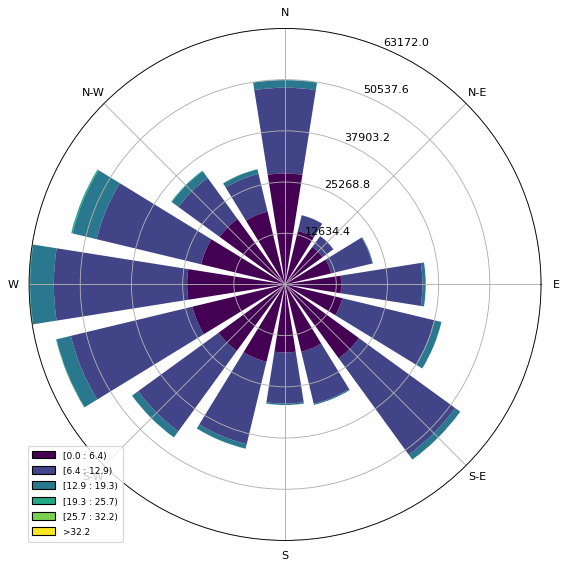

In [13]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ws_risoe_77 = df_mast_risoe['ws77'].to_numpy()
wd_risoe_77 = df_mast_risoe['wd77'].to_numpy()

# Remove NaN values from both arrays
valid_indices = ~np.isnan(ws_risoe_77) & ~np.isnan(wd_risoe_77)
ws_risoe_77_clean = ws_risoe_77[valid_indices]
wd_risoe_77_clean = wd_risoe_77[valid_indices]

# Plot wind rose
ax = WindroseAxes.from_ax()
ax.bar(wd_risoe_77_clean, ws_risoe_77_clean)
ax.set_legend()

plt.show()

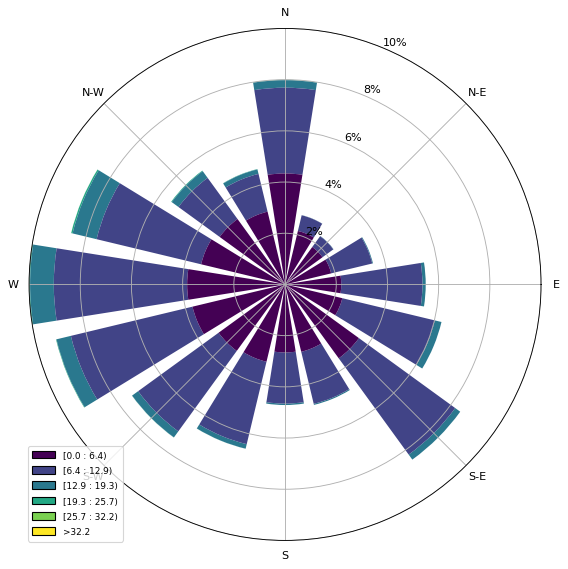

In [14]:
# Plot wind rose
ax = WindroseAxes.from_ax()
ax.bar(wd_risoe_77_clean, ws_risoe_77_clean, normed=True)
ax.set_legend()

# Format radius axis to percentages
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

plt.show()

Converting the data to a Pandas DataFrame, to make it easier to work with.
Converting time to datetime objects, and setting it as the index.

In [15]:
df_mast_risoe = pd.DataFrame()
df_mast_risoe['time'] = pd.to_datetime([datetime(1995, 11, 20, 16, 25) + timedelta(minutes=int(m)) for m in dataset.variables['time'][:]])
df_mast_risoe['ws77'] = np.array(dataset.variables['ws77'][:])
df_mast_risoe['wd77'] = np.array(dataset.variables['wd77'][:])
df_mast_risoe['ws125'] = np.array(dataset.variables['ws125'][:])
df_mast_risoe['wd125'] = np.array(dataset.variables['wd125'][:])

df_mast_risoe.set_index('time', inplace=True)

## Handleing missing values

Plotting the data so se where data is mussing

array([[<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>]], dtype=object)

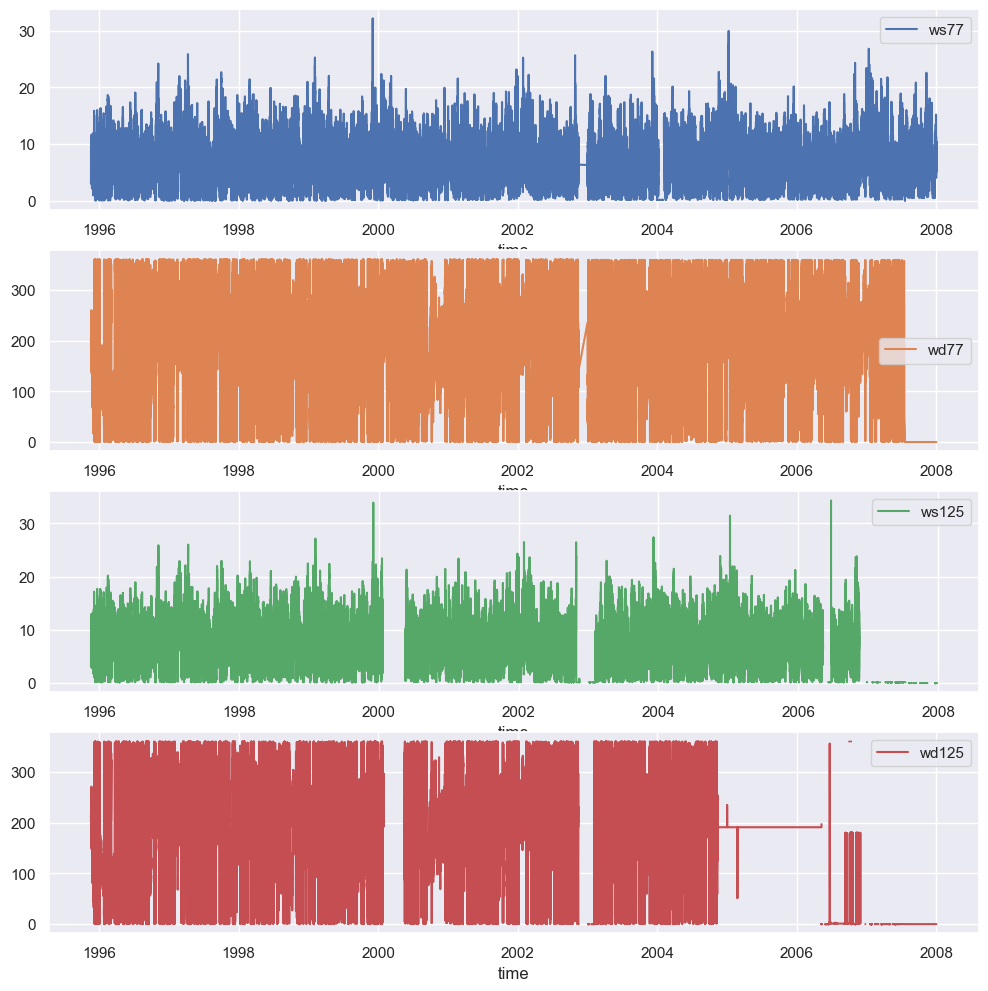

In [16]:
sns.set()
df_mast_risoe.plot(subplots=True, layout=(4,1), figsize=(12,12), sharex=False, sharey=False)